## Random Forest Regression

In [76]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#### 1. Khai báo 1 số hàm trực quan 

In [77]:
def _plot_time_series(y_act, y_pred, dates, title="", xlabel="Time", ylabel="Value"):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, y_act, 'r-o', label="Actual Value")
    plt.plot(dates, y_pred, '--', label="Predicted Value")

    y_min = min(np.min(y_act), np.min(y_pred))
    y_max = max(np.max(y_act), np.max(y_pred))
    plt.axis([dates[0], dates[-1], y_min*0.95, y_max*1.05])

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.legend(fontsize=16)
    plt.title(title, fontsize=20)
    plt.xticks(dates[::10], fontsize=16, rotation=45)  # Xoay ngày để tránh chồng chéo
    plt.tight_layout()  # Đảm bảo không bị cắt bớt nhãn
    plt.show()

In [78]:

def scatter_plot_act_pred_new(y_actual, y_predicted, title='So sánh giá trị AQI thực tế và phỏng đoán', xlabel='Giá trị thực tế', ylabel='Giá trị phỏng đoán'):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_predicted, alpha=0.5)
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
    
def scatter_plot_act_pred(x, y_act, y_pred, title="", xlabel="", ylabel=""):
  plt.figure(figsize=(13, 6))
  plt.scatter(x, y_act, c='r', marker='o', label="Actual values")
  plt.scatter(x, y_pred, c='b', marker='s', label="Predicted values")
  x_min = np.min(x)
  x_max = np.max(x)
  y_min = np.min(y_act)
  y_max = np.max(y_act)
  # mean value
  ybar = np.mean(y_act)
  plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])
  plt.xlabel(xlabel, fontsize=16)
  plt.ylabel(ylabel, fontsize=16)
  plt.legend(fontsize=15)
  plt.title(title, fontsize=20)
  plt.show()

#### 2. Chọn đặc trưng 

##### 2.1 Đọc dữ liệu

- Tập train

In [79]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Date,AQI-IN,PM2.5,PM10,SO2,NO2,O3,CO,Temp,Humidity,AQI_Label
0,2021-04-08,4.787561,4.127394,4.521907,2.644121,3.333478,5.567764,23.280893,-0.354070,6.633250,1.0
1,2021-04-09,5.683591,4.941693,5.062635,2.491780,3.638278,6.244998,24.859606,-0.264799,6.244998,2.0
2,2021-04-10,5.365998,4.736275,4.969862,2.094713,3.466711,6.480741,24.331050,0.003014,6.480741,2.0
3,2021-04-11,4.997258,4.127394,4.820347,1.818446,2.893444,6.708204,16.822604,0.092285,6.855655,1.0
4,2021-04-12,4.430958,3.527224,3.951613,1.443635,2.776472,6.403124,26.832816,-0.175528,8.306624,0.0


- Tập test

In [80]:
df_test = pd.read_csv("TransformedDataTest.csv")
df_test.head()

,Date,AQI-IN,PM2.5,PM10,SO2,NO2,CO,Temp,Humidity,AQI_Label
0,2024-04-08,5.337561,2.998223,5.429365,0.881374,2.491780,10.000000,-2.039323,4.358899,2.0
1,2024-04-09,5.575963,4.897895,5.135833,2.094713,3.333478,16.822604,-2.353065,3.872983,2.0
2,2024-04-10,5.805144,5.036995,5.123999,2.491780,3.466711,19.570386,-1.725581,5.916080,2.0
3,2024-04-11,5.613141,4.912709,5.123999,1.443635,3.093102,21.610183,-0.784355,7.810250,2.0
4,2024-04-12,5.010680,4.304248,4.969862,1.443635,2.776472,20.000000,-0.156871,7.280110,1.0


##### 2.2 Biến đầu vào

- Tập train

In [81]:
x = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'Temp']]
x.head()

,PM2.5,PM10,SO2,NO2,Temp
0,4.127394,4.521907,2.644121,3.333478,-0.354070
1,4.941693,5.062635,2.491780,3.638278,-0.264799
2,4.736275,4.969862,2.094713,3.466711,0.003014
3,4.127394,4.820347,1.818446,2.893444,0.092285
4,3.527224,3.951613,1.443635,2.776472,-0.175528


- Tập test

In [82]:
x_test = df_test[['PM2.5', 'PM10', 'SO2', 'NO2', 'Temp']]
x_test.head()

,PM2.5,PM10,SO2,NO2,Temp
0,2.998223,5.429365,0.881374,2.491780,-2.039323
1,4.897895,5.135833,2.094713,3.333478,-2.353065
2,5.036995,5.123999,2.491780,3.466711,-1.725581
3,4.912709,5.123999,1.443635,3.093102,-0.784355
4,4.304248,4.969862,1.443635,2.776472,-0.156871


##### 2.3 Biến mục tiêu

- Tập train

In [83]:
y = df[['AQI-IN']]
y.head()

,AQI-IN
0,4.787561
1,5.683591
2,5.365998
3,4.997258
4,4.430958


- Tập test

In [84]:
y_test = df_test[['AQI-IN']]
y_test.head()

,AQI-IN
0,5.337561
1,5.575963
2,5.805144
3,5.613141
4,5.010680


##### 2.4 Chia thành 2 tập train và tập validation

<li>Chọn giá trị random_state cho hàm chia tập dữ liệu</li>

In [85]:
# random_states = range(1, 1000)
# mean_scores = []
# for random_state in random_states:
#     scores = []
#     for _ in range(50): 
#         X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=random_state)
#         model = LinearRegression()
#         model.fit(X_train, y_train)
#         score = model.score(x_test, y_test)
#         print(score)
#         scores.append(score)
#     mean_scores.append(np.mean(scores))

# best_random_state = random_states[np.argmax(mean_scores)]
# print("Best random state:", best_random_state)

<li>Chia dữ liệu</li>

In [86]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=544)
y_train = np.ravel(y_train)
y_validation = np.ravel(y_validation)
y_test = np.ravel(y_test)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(876, 5) (220, 5)
(876,) (220,)


#### 3. Huấn luyện mô hình

##### 3.1 Tạo một đối tượng mô hình hồi quy tuyến tính từ thư viện linear_model và huấn luyện nó với biến đầu vào và biến mục tiêu

In [87]:
randomForest_regressor = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features=None,  # hoặc 'sqrt', 'log2', hoặc một số nguyên hoặc float khác
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None,
    random_state=None, 
    verbose=0,
    warm_start=False
)

randomForest_regressor.fit(X_train, y_train)

RandomForestRegressor(max_features=None)

##### Hệ số tương quan Coefficient và giá trị lệch Intercept <br>

In [88]:
# print( 'Coefficient : ', randomForest_regressor.coef_ )
# print( 'Interception  : ', randomForest_regressor.intercept_ )

##### 3.2 Dự đoán giá trị AQI-IN

<li>Trên tập train</li>

In [89]:
ypred_train = randomForest_regressor.predict(X_train)
ypred_train

array([4.71292141, 5.31704011, 4.01141777, 4.73147167, 4.1147307 ,
       5.36235909, 4.50408114, 4.84555129, 5.17673248, 4.57729203,
       5.70589453, 4.59520105, 5.76463914, 4.14832561, 4.22339634,
       4.07929395, 4.39181171, 4.92526659, 5.09062001, 4.85819906,
       4.22722922, 4.76732655, 4.81703835, 4.7489449 , 5.1784527 ,
       4.58528199, 4.4640592 , 4.33780072, 4.95539899, 4.81785106,
       4.67379962, 5.30487798, 4.35555853, 4.75546531, 5.31491366,
       3.88723651, 4.17835706, 6.06319827, 4.3714947 , 4.352437  ,
       4.2776284 , 4.08830438, 5.93514245, 4.55383293, 4.64943669,
       4.85835098, 4.80212445, 4.28801196, 4.3419751 , 3.75891649,
       4.73055687, 4.65183578, 4.66828549, 4.69488255, 4.44100875,
       4.69431157, 5.38743428, 5.1298637 , 4.48919256, 4.64882829,
       4.19124552, 4.07909581, 4.03441698, 4.26605116, 4.19092659,
       5.46149807, 4.73626427, 4.95237909, 4.27747422, 5.10067213,
       4.28841706, 4.11385328, 5.00174409, 5.32193991, 4.24386

<li>Dự đoán trên tập validation</li>

In [90]:
ypred_validation = randomForest_regressor.predict(X_validation)
ypred_validation

array([3.96012564, 4.69276022, 4.66940616, 4.75209277, 5.04703668,
       3.52589373, 4.33830723, 4.73988754, 5.06742216, 4.77596986,
       5.49252583, 4.31133259, 5.26864535, 5.27530194, 4.20305513,
       4.29581585, 4.97265201, 4.14695962, 5.5295207 , 4.95572822,
       5.27783505, 4.58528199, 4.52887147, 4.78272679, 6.20283123,
       4.55255038, 4.35489324, 5.63659073, 4.61092006, 4.46827361,
       4.5204203 , 4.09332286, 5.68516718, 4.69360793, 4.19962768,
       4.41092102, 5.04271876, 6.12132416, 4.86401637, 4.85813426,
       5.24750752, 4.68090259, 5.28611403, 4.43519282, 5.4117346 ,
       4.59615266, 5.68087051, 4.76617915, 5.19660964, 4.19652846,
       4.81422432, 4.33877197, 6.054688  , 5.15420669, 4.08018727,
       4.2361011 , 5.2122241 , 4.71109464, 5.8367776 , 5.4034335 ,
       5.70355351, 4.56166289, 4.76805892, 4.96096373, 4.18160444,
       4.79724453, 5.4689949 , 4.15130973, 3.99192552, 5.14187019,
       6.09067065, 5.34676552, 4.72325247, 4.3212929 , 4.32025

- Tập test

In [91]:
ypred_test = randomForest_regressor.predict(x_test)
ypred_test

array([5.32484269, 5.53576833, 5.73343744, 5.47602113, 5.04483337,
       4.64389323, 4.5382722 , 6.03424559, 5.3098319 , 4.72874289,
       4.95583105, 4.75413254, 5.59251292, 4.955905  , 4.86675071,
       5.01827388, 4.84750278, 4.70244284, 4.90762366, 4.66610463,
       4.08542969, 4.62445862, 5.12497582, 4.88695006, 4.88068705,
       5.22218203, 4.47752544, 4.83694174, 4.98226567, 4.8037635 ,
       5.09697229, 5.19079147, 5.37530015, 5.32980255, 4.46563916,
       5.05608372, 5.17728468, 4.5769717 , 4.79008051, 4.99754339,
       4.92047062, 4.4058958 , 4.24427604, 4.95033202])

#### 4. Đánh giá mô hình

##### 4.1 Tính toán sai số trung bình bình phương MSE

<li>Tâp Train</li>

In [92]:
differences = y_train - ypred_train
squared_differences = differences ** 2
mse = np.mean(squared_differences)
print('Mean Squared Error MSE:', mse)

Mean Squared Error MSE: 0.002340972929342128


<li>Tập validation</li>

In [93]:
differences = y_validation - ypred_validation
squared_differences = differences ** 2
mse = np.mean(squared_differences)
print('Mean Squared Error MSE:', mse)

Mean Squared Error MSE: 0.019625272377280855


- Tập test

In [94]:
differences = y_test - ypred_test
squared_differences = differences ** 2
mse = np.mean(squared_differences)
print('Mean Squared Error MSE:', mse)

Mean Squared Error MSE: 0.014051482945106563


##### 4.2 R-squared cho ta biết mức độ các biến đầu vào sẽ giải thích được bao nhiêu phần trăm biến mục tiêu. R-squared càng lớn thì mô hình càng tốt, khi R-squared bằng 95% điều đó có nghĩa rằng các biến đầu vào đã giải thích được 95% sự biến động của biến mục tiêu.

<li>Tập train</li>

In [95]:
y_mean = np.mean(y_train)
TSS = np.sum((y_train - y_mean) ** 2, axis=0)
RSS = np.sum((y_train - ypred_train) ** 2, axis=0)
R_squared = (1 - (RSS / TSS)) 
R_squared

0.9922085106041113

<li>Tập validation</li>

In [96]:
y_mean = np.mean(y_validation)
TSS = np.sum((y_validation - y_mean) ** 2, axis=0)
RSS = np.sum((y_validation - ypred_validation) ** 2, axis=0)
R_squared = (1 - (RSS / TSS)) 
R_squared

0.9377518059489977

- Tập test

In [97]:
y_mean = np.mean(y_test)
TSS = np.sum((y_test - y_mean) ** 2, axis=0)
RSS = np.sum((y_test - ypred_test) ** 2, axis=0)
R_squared = (1 - (RSS / TSS)) 
R_squared

0.933837159367131

##### 4.3 MAPE là chỉ số đo lường tỷ lệ phần trăm sai số giữa giá trị dự báo và giá trị thực tế (mean absolute percentage error) <br>      Khi một mô hình có MAPE = 5% ta nói rằng mô hình có trung bình sai số là 5% so với giá trị trung bình

<li>Tập train</li>

In [98]:
n = len(y_train)  
mape = (1/n) * np.sum((np.abs((ypred_train - y_train))) , axis=0)
mape

0.03356591929465568

<li>Tập validation</li>

In [99]:
n = len(y_validation)  
mape = (1/n) * np.sum((np.abs((ypred_validation - y_validation))) , axis=0)
mape

0.09674476340694091

- Tập test

In [100]:
n = len(y_test)  
mape = (1/n) * np.sum((np.abs((ypred_test - y_test))) , axis=0)
mape

0.0845786374290992

##### 4.4 Trực quan sự chênh lệch đặc trưng AQI-IN giữa giá trị ban đầu và giá trị được dự đoán 

- Tập train và tập validation

In [101]:
# scatter_plot_act_pred_new(y_test, ypred_test)

- Tập train và tập test

In [102]:
# scatter_plot_act_pred_new(y_test, ypred_test)

- Tập train và tập đánh giá

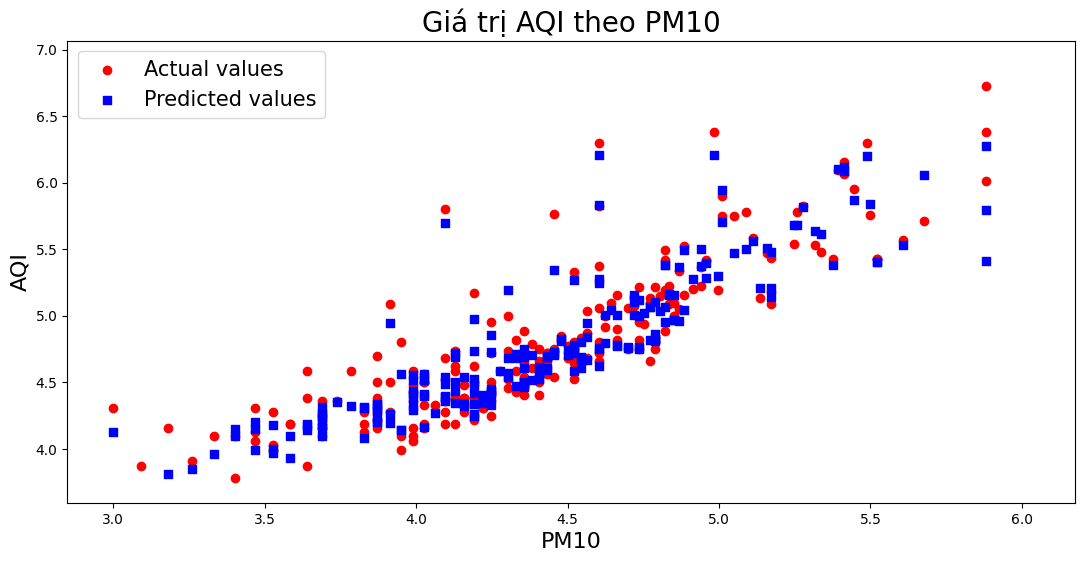

In [103]:
# scatter_plot_act_pred(y_validation, ypred_validation, 
#       title='So sánh giá trị AQI thực tế và phỏng đoán',  
#       xlabel='Sample', 
#       ylabel='AQI')
scatter_plot_act_pred(X_validation['PM10'], y_validation, ypred_validation, 
      title='Giá trị AQI theo PM10',  
      xlabel='PM10', 
      ylabel='AQI')

- Tập train và tập test

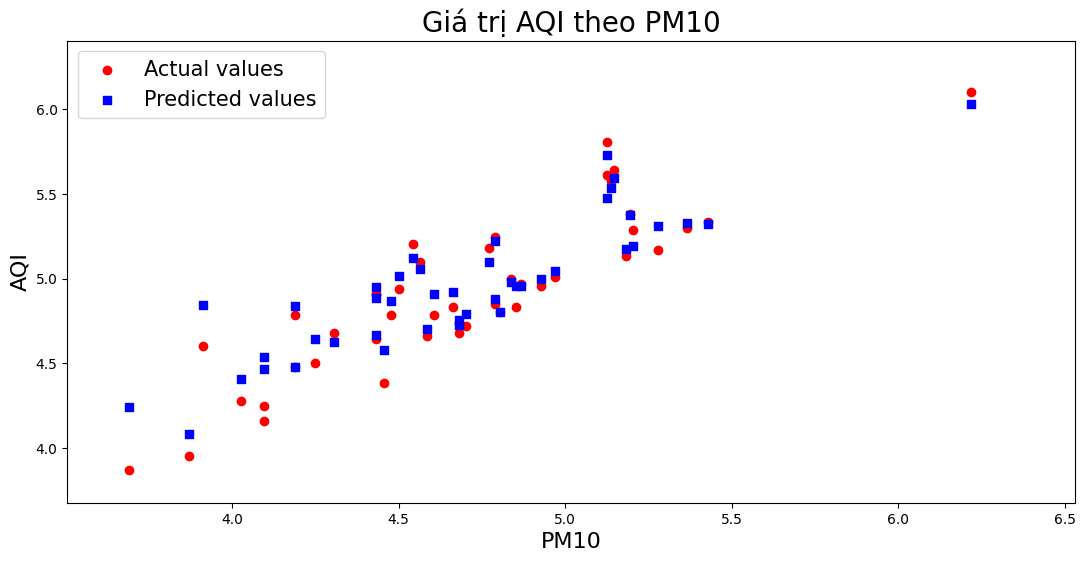

In [104]:
scatter_plot_act_pred(x_test['PM10'], y_test, ypred_test, 
      title='Giá trị AQI theo PM10',  
      xlabel='PM10', 
      ylabel='AQI')

- Tập validation

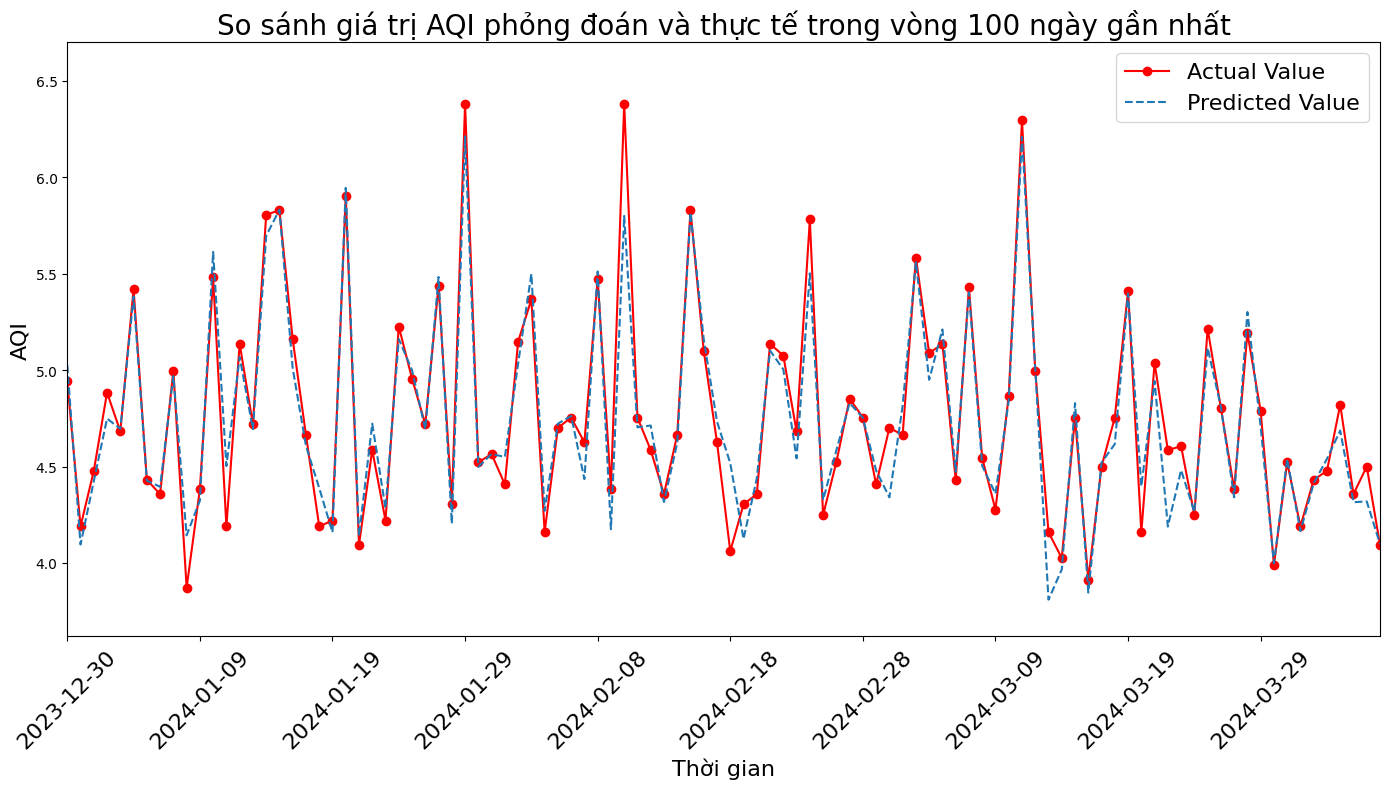

In [105]:
_plot_time_series(y_validation[-100:], ypred_validation[-100:], df['Date'][-100:].values, 
                  title='So sánh giá trị AQI phỏng đoán và thực tế trong vòng 100 ngày gần nhất',  
                  xlabel='Thời gian', 
                  ylabel='AQI')

- Tập test

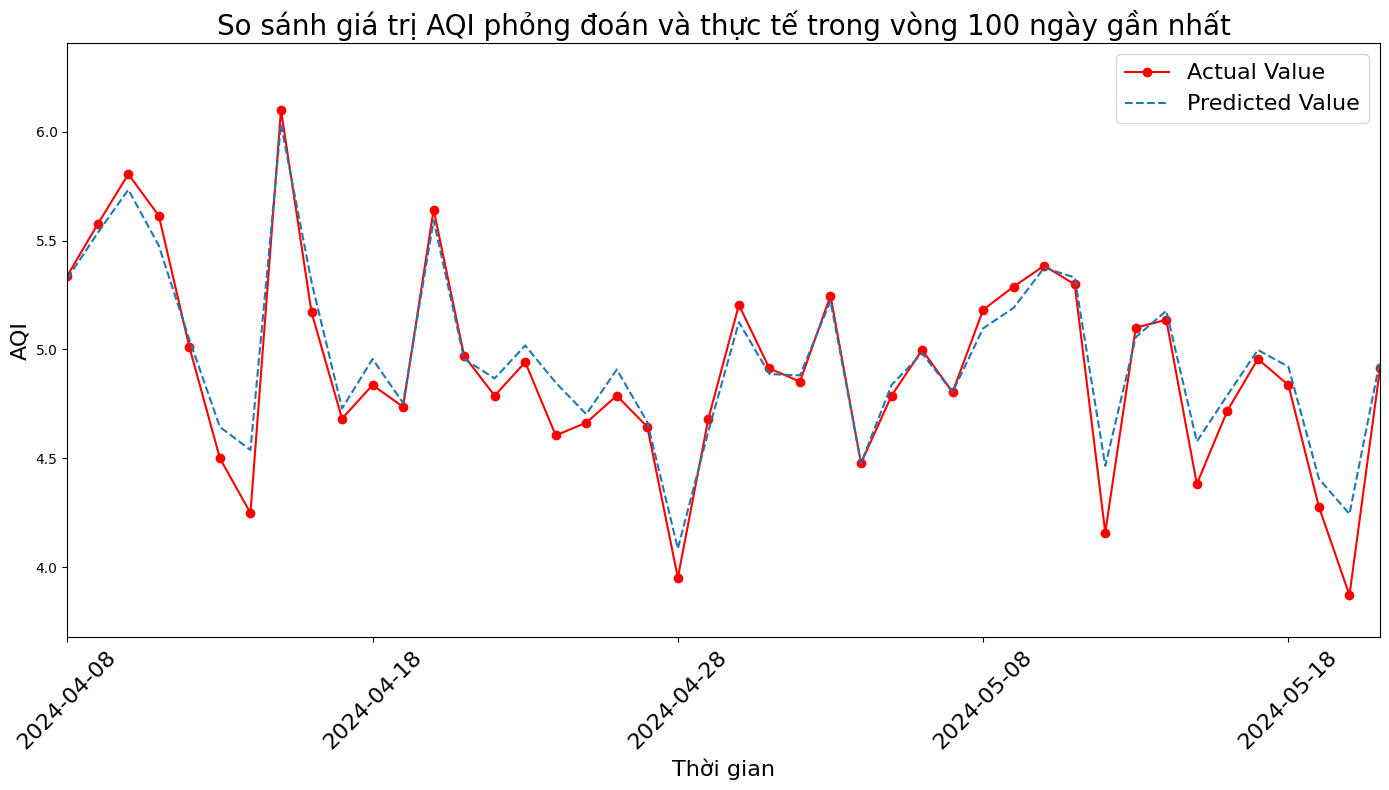

In [106]:
_plot_time_series(y_test, ypred_test, df_test['Date'].values, 
                  title='So sánh giá trị AQI phỏng đoán và thực tế trong vòng 100 ngày gần nhất',  
                  xlabel='Thời gian', 
                  ylabel='AQI')

#### 5. Kết luận

<li>Linear Regression là một thuật toán học có giám sát, được sử dụng để ước lượng mối quan hệ giữa các biến độc lập và biến phụ thuộc. Đây là một phương pháp thống kê dùng để tìm ra hàm tuyến tính tốt nhất để biểu diễn mối quan hệ này.</li>
<li>Dựa trên giả định rằng sự tương quan giữa các biến là tuyến tính, thuật toán này dự báo giá trị của biến mục tiêu từ các giá trị của các biến đầu vào.</li>
<li>Đây là phương pháp được cho là Simple Regression, dễ bị Overfitting tuy nhiên trong trường hợp thực hiện trên tập dữ liệu vừa và nhỏ thì không quá lo ngại.</li>
<li>Phương pháp này cũng kém ổn định, khi giá trị của random_state thay đổi có thể dẫn đến sự biến động trong hiệu suất của mô hình.</li>
